**CCD Project Results**
*created by Jordan Muraskin*

In [38]:
% pylab inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
import matplotlib.pyplot as plt
init_notebook_mode()
import CCD_packages
reload(CCD_packages)
print 'First SLIDE'

Populating the interactive namespace from numpy and matplotlib


First SLIDE


In [37]:
! git pull

remote: Counting objects: 4, done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/jordanmuraskin/CCD-scripts
   2f06508..b9fdbb8  master     -> origin/master
Updating 2f06508..b9fdbb8
Fast-forward
 analysis/CCD_packages.py | 6 ++++--
 1 file changed, 4 insertions(+), 2 deletions(-)


Get Subject Info

In [20]:
GroupDF,motionInfo=CCD_packages.getCCDSubjectData()

Select which subjects to use

In [21]:
goodsubj = CCD_packages.getSubjectList(GroupDF=GroupDF)

**Resting State Network Time Series with Model**

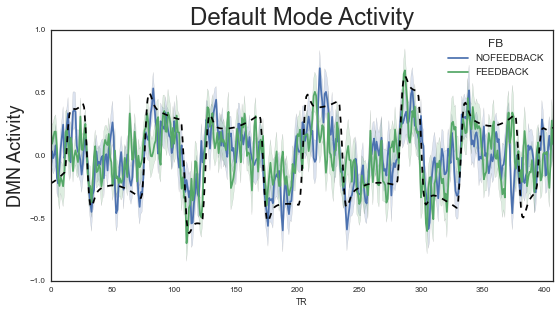

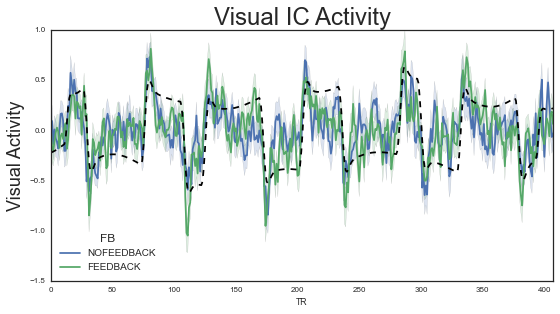

In [22]:
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN3',title='Default Mode Activity',ylabel='DMN Activity',figsize=(9,4.5))
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN0',title='Visual IC Activity',ylabel='Visual Activity',figsize=(9,4.5))

**Model Correlations for Each Subject**

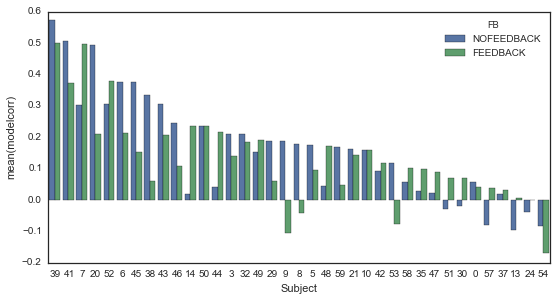

In [23]:
CCD_packages.createSubjectModelBarPlot(GroupDF,goodsubj,figsize=(9,4.5),savefig=True)

**Scan Order model correlations**

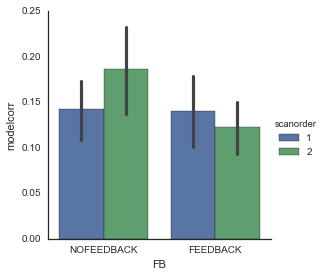

In [24]:
CCD_packages.createScanOrderBarPlot(GroupDF,goodsubj)

**Output Mean Subject Model Correlations for Default Mode Network**

In [25]:
# print 'RSN3'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN3')

No Feedback Focus Correlation= -0.70
Feedback Focus Correlation= -0.57
No Feedback Wander Correlation= 0.67
Feedback Wander Correlation= 0.59
No Feedback Overall Correlation= 0.70
Feedback Overall Correlation= 0.60


In [26]:
print 'RSN0'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN0')

RSN0
No Feedback Focus Correlation= -0.54
Feedback Focus Correlation= -0.67
No Feedback Wander Correlation= 0.55
Feedback Wander Correlation= 0.66
No Feedback Overall Correlation= 0.56
Feedback Overall Correlation= 0.69


In [27]:
hmFB,hmNFB,hmDiff=CCD_packages.generateHeatMaps(GroupDF,goodsubj)

**Resting State Network Connectivity Matrices**

In [28]:
fig=CCD_packages.heatmap2Chord(hmFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback On',savefig=False,scale=[-1,1])
iplot(fig)

In [29]:
iplot(CCD_packages.heatmap2Chord(hmNFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback Off',savefig=False,scale=[-1,1]))

In [30]:
from scipy.stats import ttest_1samp
from mne.stats.multi_comp import fdr_correction
from numpy import triu_indices,tril_indices
t,p=ttest_1samp(hmDiff,0,axis=2)
row,column=triu_indices(10,1)
rowl,columnl=tril_indices(10)
# sns.heatmap(t)
p05,padj=fdr_correction(p[row,column],0.05)
fdr_corrected=t.copy()
fdr_corrected[rowl,columnl]=0
fdr_corrected[row,column]=t[row,column]*p05

**Pairwise Differences between Feedback On vs. Feedback Off Resting State Network Connectivity**

In [31]:
iplot(CCD_packages.heatmap2Chord(fdr_corrected,plotName='FeedbackDiffChordDiagram',title='Network Correlations differences between Feedback On/Off',savefig=False,scale=[-10,10]))

In [32]:
predictions,coefs,performance,fb_coefs,nfb_coefs=CCD_packages.linearRegressionData(GroupDF,goodsubj,numFolds=10)

Running Feedback on Regressions
Finished...
Running Feedback off Regressions
Finished...


**10-Fold Linear Regression Model Prediction with RSN Timeseries**

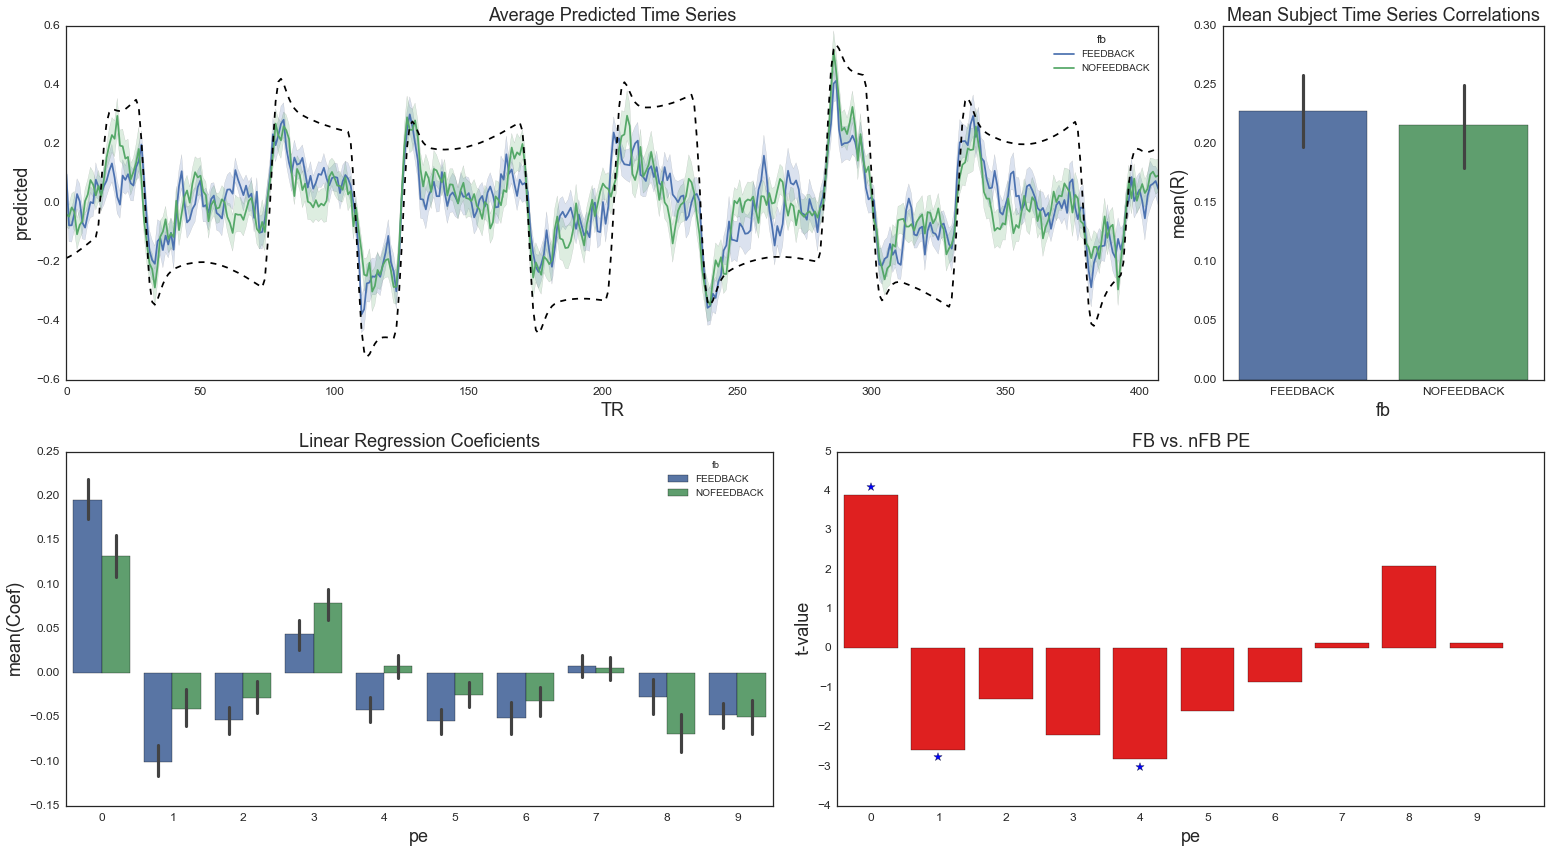

In [33]:
CCD_packages.createRegressionPlots(predictions,performance,coefs,fb_coefs,nfb_coefs,GroupDF,goodsubj)

* *-Indicates p<0.05 FDR-Corrected Feedback On vs. Feedback Off 

/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



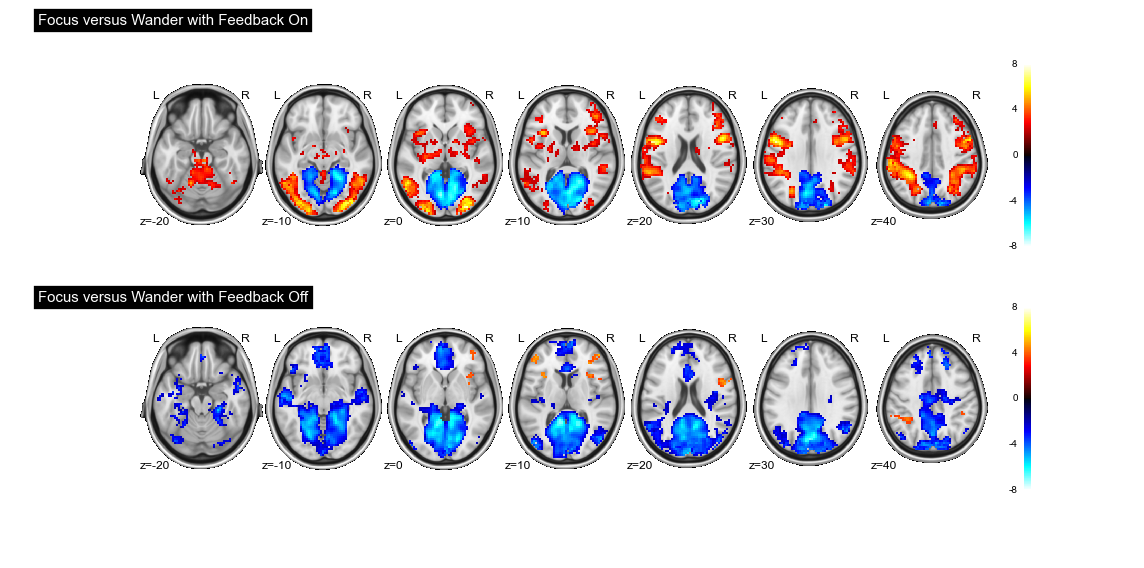

In [26]:
f, axarr = plt.subplots(2, sharex=True,figsize=(16,8))

TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='Focus versus Wander with Feedback On',plotToAxis=True,axes=axarr[0],f=f)

TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='Focus versus Wander with Feedback Off',plotToAxis=True,axes=axarr[1],f=f)

f.tight_layout()

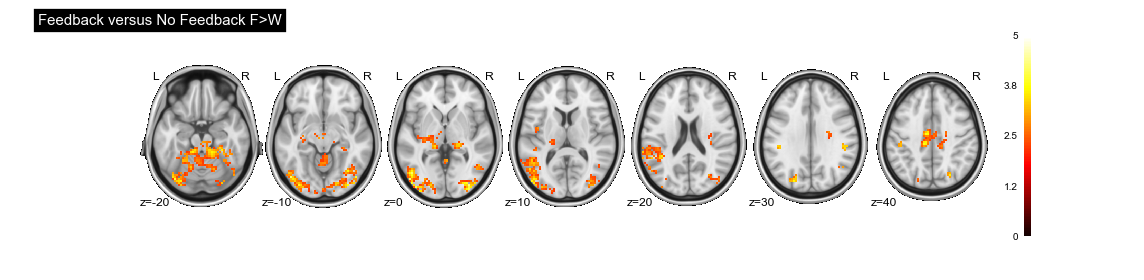

In [44]:
f, axarr = plt.subplots(1,figsize=(16,4))
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope1/cope1/cope1_tstat2.nii.gz'
CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,vmax=5,title='Feedback versus No Feedback F>W',plotToAxis=True,f=f,axes=axarr)
f.tight_layout()

/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/nilearn/_utils/param_validation.py:61: UserWarning:

The given float value must not exceed 0.76931655407. But, you have given threshold=0.949 



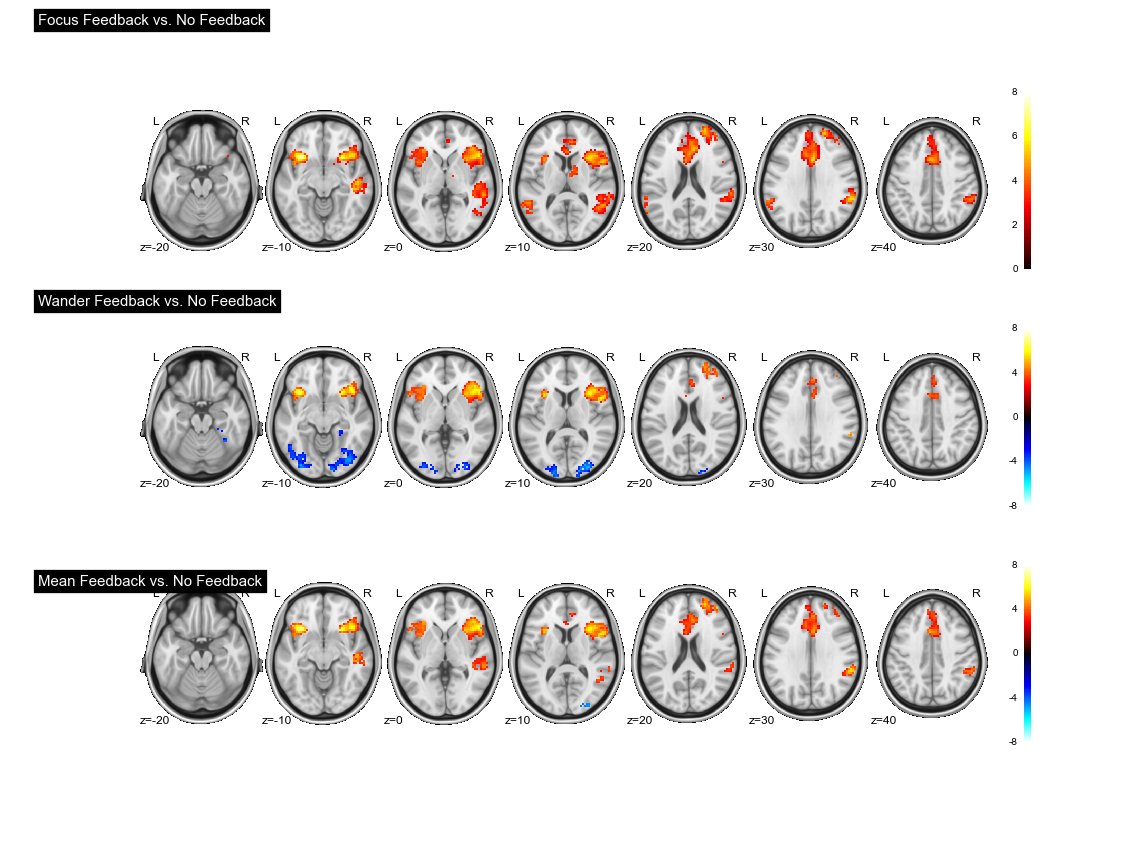

In [45]:
f, axarr = plt.subplots(3, sharex=True,figsize=(16,12))

names=['Focus','Wander','Mean']

for indx,cope in enumerate(range(3,6)):
    TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tfce_corrp_tstat1.nii.gz' % (cope,cope,cope)
    posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tstat1.nii.gz' % (cope,cope,cope)
    TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tfce_corrp_tstat2.nii.gz' % (cope,cope,cope)
    negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/paired-Ttest/motionThresh-0.200000/cope%d/cope%d/cope%d_tstat2.nii.gz' % (cope,cope,cope)
    CCD_packages.createTFCEfMRIOverlayImages(TFCEposImg,posImg,TFCEnegImg,negImg,title='%s Feedback vs. No Feedback' % names[indx],plotToAxis=True,axes=axarr[indx],f=f)
f.tight_layout()